# Preprocessing: Data splitting and standardscaling the input images

In the result we have our train, validation and test data (both input and output)

In [1]:
# Importing all packages

import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Randomize but always the same random numbers

np.random.seed(42)
random.seed(42)

In [3]:
os.chdir("C:/Users/Lenovo/Documents/DL_hf/GeFace/")
try:
    df = pd.read_csv("data/dataset.csv", delimiter=';',index_col=0)
    pd.set_option('display.max_columns', 100)
except (FileNotFoundError):
    print("CSV file not found")
    current_path = os.getcwd()
    print("Current path is " + current_path)

In [4]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0


In [5]:
image_path = 'C:/Users/Lenovo/Documents/DL_hf/GeFace/resized/'

## New part - Data splitting

Split the dataset into train, validation and test dataset. Rule is : 70-20-10 

In [6]:
# shuffle the rows
df = shuffle(df)

In [7]:
df.head()

,age,full_path,gender
396541,22,41/nm2374841_rm226474752_1987-3-19_2009.jpg,0.0
177124,37,27/nm0005527_rm1698345984_1972-7-10_2009.jpg,0.0
424187,24,53/nm0488953_rm3146883072_1989-10-1_2013.jpg,0.0
250688,16,27/nm1227027_rm3763247360_1987-8-8_2003.jpg,1.0
187962,34,57/nm0206257_rm2710020352_1979-5-9_2013.jpg,0.0


In [8]:
df.shape

(460070, 3)

In [9]:
# calculate test train valid data numbers
test_num = int(np.floor(0.1 * df.shape[0]))
valid_num = int(np.floor(0.2 * df.shape[0]))
train_num = int(df.shape[0] - test_num - valid_num)
print("train: {} | valid: {} | test: {}".format(train_num, valid_num, test_num))

train: 322049 | valid: 92014 | test: 46007


In [10]:
# split the data into train valid and test data
train_data = df.iloc[0:train_num,:]
train_data.shape

(322049, 3)

In [11]:
valid_data = df.iloc[train_num:train_num + valid_num, :]
valid_data.shape

(92014, 3)

In [12]:
test_data = df.iloc[ train_num+valid_num:,:]
test_data.shape

(46007, 3)

In [13]:
x_train_p = image_path+ train_data['full_path'].values
x_valid_p = image_path+valid_data['full_path'].values
x_test_p = image_path+test_data['full_path'].values
x_test_p.shape

(46007,)

In [14]:
y_train = train_data['age'].values
y_valid = valid_data['age'].values
y_test = test_data['age'].values

In [15]:
x_valid=[]
for i in range(valid_num):
    x_valid.append(cv.imread(x_valid_p[i]))
#x_valid = np.array(x_valid).reshape(valid_num,-1).astype('float32')


In [16]:
x_test=[]
for i in range(test_num):
    x_test.append(cv.imread(x_test_p[i]))
#x_test = np.array(x_test).reshape(test_num,-1).astype('float32')

In [17]:
x_train=[]
for i in range(train_num):
    x_train.append(cv.imread(x_train_p[i]))
#x_train = np.array(x_train).reshape(train_num,-1).astype('float32')


In [19]:
# Basic standardscaling
# x_train = x_train/255
# x_valid = x_valid/255
# x_test = x_test/255

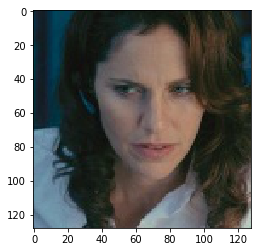

In [20]:
# Example image
plt.figure()
image = x_train[9].reshape(128,128,3)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

In [21]:
# Output:

y_train[9]

43